In [0]:
try:
  %tensorflow_version 2.x
except:
  pass
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, LSTM, BatchNormalization, Dense, Dropout
from tensorflow.keras.models import Model

In [14]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train.mean(axis=3), x_test.mean(axis=3)  # convert to grayscale
y_train, y_test = y_train.flatten(), y_test.flatten()
N_train, N_test = len(y_train), len(y_test)
K = len(set(y_train))
print(f'Number of classes: {K}')

Number of classes: 10


truck


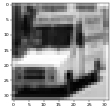

Continue? (Y/n): Y
cat


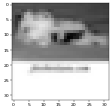

Continue? (Y/n): n


In [19]:
labels = [
  'airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck',
]
assert len(labels) == K
while True:
  i = np.random.choice(range(N_train))
  plt.figure(dpi=32)
  plt.imshow(x_train[i], cmap='gray')
  # plt.title(labels[y_train[i]])
  print(labels[y_train[i]])
  plt.show()
  if input(prompt='Continue? (Y/n): ') == 'n': break

In [0]:
# Normalize pixel intensities between [-1, 1]
if x_train.max() > 1:
  x_train, x_test = 2.*x_train/255. - 1., 2.*x_test/255. - 1.

In [24]:
i = Input(x_train.shape[1:])
x = LSTM(units=128)(i)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(units=K, activation='softmax')(x)

m = Model(i, x)
m.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])
m.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32)]          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               82432     
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290

In [25]:
r = m.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=25)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 75s 1ms/sample - loss: 1.9573 - accuracy: 0.2905 - val_loss: 1.7388 - val_accuracy: 0.3726
Epoch 2/25
50000/50000 [==============================] - 73s 1ms/sample - loss: 1.7073 - accuracy: 0.3843 - val_loss: 1.6203 - val_accuracy: 0.4130
Epoch 3/25
50000/50000 [==============================] - 73s 1ms/sample - loss: 1.6015 - accuracy: 0.4274 - val_loss: 1.5313 - val_accuracy: 0.4464
Epoch 4/25
50000/50000 [==============================] - 74s 1ms/sample - loss: 1.5230 - accuracy: 0.4519 - val_loss: 1.5150 - val_accuracy: 0.4532
Epoch 5/25
50000/50000 [==============================] - 73s 1ms/sample - loss: 1.4595 - accuracy: 0.4786 - val_loss: 1.4533 - val_accuracy: 0.4814
Epoch 6/25
50000/50000 [==============================] - 75s 1ms/sample - loss: 1.4013 - accuracy: 0.5023 - val_loss: 1.4234 - val_accuracy: 0.4868
Epoch 7/25
50000/50000 [==============================] 

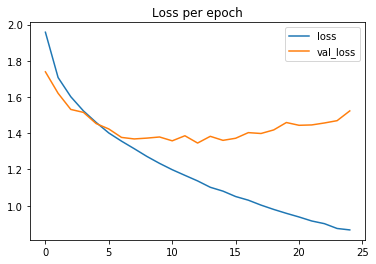

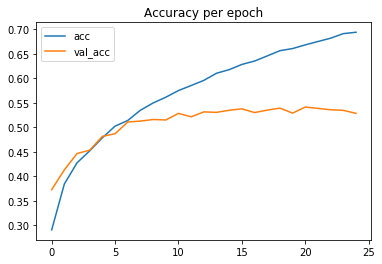

In [26]:
plt.title('Loss per epoch')
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.title('Accuracy per epoch')
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

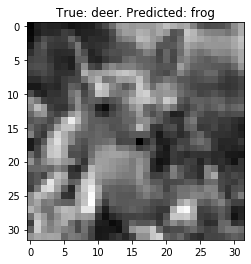

Continue? (Y/n): Y


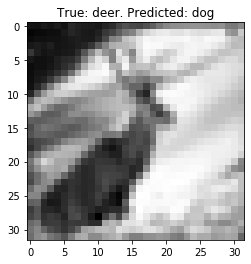

Continue? (Y/n): n


In [27]:
# Show some misclassified examples
p_test = m.predict(x_test).argmax(axis=1)
misclassified_idx = np.where(p_test != y_test)[0]
while True:
  i = np.random.choice(misclassified_idx)
  plt.imshow(x_test[i], cmap='gray')
  plt.title("True: %s. Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));
  plt.show()
  if input(prompt='Continue? (Y/n): ') == 'n': break

In [0]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=90)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix, without normalization
[[632  21 102  21  37  15  21  32  82  37]
 [ 31 643  15  17  20  15  35  16  44 164]
 [ 74  17 473 103  94  78  64  52  25  20]
 [ 31  20 120 305  80 201  91  84   8  60]
 [ 30  12 233  73 404  75  46  91  18  18]
 [ 21  15  98 181  78 457  32  82  12  24]
 [ 19  27 122 109  72  59 534  18  11  29]
 [ 28   4  65  65  75  99  18 605  15  26]
 [144  69  38  20  22  15   8  17 623  44]
 [ 31 174  15  31  17  14  19  43  48 608]]


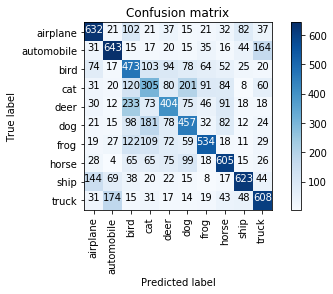

In [43]:
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, labels[0:10])